<a href="https://colab.research.google.com/github/Ness731/3-Min-Deeplearning/blob/main/Chapter.7_%EC%88%9C%EC%B0%A8%EC%A0%81%EC%9D%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EC%B2%98%EB%A6%AC%ED%95%98%EB%8A%94_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __RNN(Recurrent Neural Network)__
앞서 배운 ANN, DNN, CNN, 오토인코더는 시간에 대한 개념이 없었다. 그러나 우리가 현실에서 접하는 거의 모든 데이터는 순차적(Sequential)이다. 이러한 __순차적인 데이터(시계열 데이터)__를 처리하기 위해서 고안된 신경망이 바로 RNN이다.

__| RNN :__ 정해지지 않은 길이의 데이터 배열을 순차적으로 읽고 작업을 수행하는 신경망 <br>

__| 특징__<br> 
- RNN은 __은닉벡터(hidden vector)__를 출력하며, 순차적 데이터의 흐름을 모두 내포한다.
- RNN은 어떤 시점에서의 입력값에 대한 출력값을 계산할 때, 직전 출력값을 특정 비율만큼 반영하여 연산한다. (시간개념)
<br>

__| RNN의 형태__
- __일대일__ : 한 개의 입력값에 대응하는 한 개의 출력값을 생성한다.<br>
  예) 일반적으로 보아온 신경망
- __일대다__ : 한 개의 입력값에 대해 은닉 벡터들을 통과하면서 여러 개의 출력값을 생성한다.<br>
  예) 이미지를 보고 안의 상황을 글로 설명하는 문제
- __다대일__ : 여러 개의 입력값에 대해 은닉 벡터들을 통과하면서 한 개의 출력값을 생성한다.<br>
  예) 챗봇과 기계 번역 같이 순차적인 데이터를 출력하는 문제
- __다대다__ : 여러 은닉 벡터를 통해 입력받은 값들에 대해 여러 개의 출력값을 생성한다.<br>
  예) 비디오 분류 같이 매 프레임을 레이블링하는 문제<br>

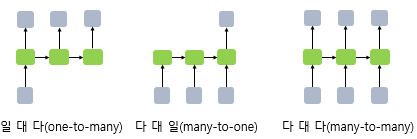

## :: 예제 - 영화 리뷰 감정 분석 ::
텍스트 형태의 데이터셋인 IMDB는 영화 리뷰(영어) 5만 건으로 이루어져있으며, 긍정적인 영화 리뷰는 2로, 부정적인 영화 리뷰는 1로 레이블링 되어있다. 이를 사용하여 영화 리뷰의 긍정/부정 여부를 판별하는 모델을 작성한다.

### __| 이슈 : 자연어 텍스트를 어떻게 학습하는가?__
자연어 텍스트를 인공 신경망에 입력시키기 위해선 __전처리 과정__을 거쳐 __데이터를 숫자로__ 나타내야 하며, 이를 __워드 임베딩(word embedding)__이라고 한다.<br>

__[워드 임베딩 과정]__
1. __토크나이징(tokenizing)__ : 문장들을 토큰(token)으로 나눈다.
2. 모든 토큰을 각각의 __벡터__로 나타낸다.
3. 모든 단어 수만큼의 벡터를 담는 __딕셔너리(dictionary)__를 정의한다.


In [3]:
# 라이브러리 import
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import data, datasets

In [4]:
# 하이퍼파라미터 정의
BATCH_SIZE = 64 # 한 번의 EPOCH에서 다룰 데이터의 양
EPOCHS = 40     # 이터레이션 횟수
lr = 0.001
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")